# Dataset
[Credit card Details Binary Classification Problem](https://www.kaggle.com/datasets/rohitudageri/credit-card-details)

## Origen
Dataset de Credit card Details Binary Classification Problem de Kaggle (https://www.kaggle.com/datasets/rohitudageri/credit-card-details), que contiene información de solicitudes de tarjetas de crédito.

## Justificacion del problema de clasificacion
Este es un problema de clasificación binaria porque el label es 0 o 1 que indica si una solicitud de tarjeta de crédito fue aprobada o rechazada. 

## Descripción del dataset


  | Columna         | Tipo              | Descripción                                                               |
  |-----------------|-------------------|---------------------------------------------------------------------------|
  | Ind_ID          | ID                | Identificador único del solicitante                                       |
  | GENDER          | Categórica        | Género (M/F)                                                              |
  | Car_Owner       | Categórica        | ¿Posee auto? (Y/N)                                                        |
  | Propert_Owner   | Categórica        | ¿Posee propiedad? (Y/N)                                                   |
  | CHILDREN        | Numérica          | Número de hijos                                                           |
  | Annual_income   | Numérica continua | Ingreso anual                                                             |
  | Type_Income     | Categórica        | Tipo de ingreso (Pensioner, Commercial associate, Working, State servant) |
  | EDUCATION       | Categórica        | Nivel educativo                                                           |
  | Marital_status  | Categórica        | Estado civil                                                              |
  | Housing_type    | Categórica        | Tipo de vivienda                                                          |
  | Birthday_count  | Numérica continua | Edad (en días negativos desde fecha de referencia)                        |
  | Employed_days   | Numérica continua | Días empleado (negativo = activo, 365243 = pensionado)                    |
  | Mobile_phone    | Binaria           | ¿Tiene teléfono móvil? (1/0)                                              |
  | Work_Phone      | Binaria           | ¿Tiene teléfono laboral? (1/0)                                            |
  | Phone           | Binaria           | ¿Tiene teléfono fijo? (1/0)                                               |
  | EMAIL_ID        | Binaria           | ¿Tiene email? (1/0)                                                       |
  | Type_Occupation | Categórica        | Ocupación                                                                 |
  | Family_Members  | Numérica          | Miembros de la familia                                                    |
  | label           | Binaria           | Aprobación (1) o Rechazo (0)                                              |


## Exploracion de datos

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('datos/credit_card.csv')
labels = pd.read_csv('datos/credit_card_label.csv')

# Merge
data = df.merge(labels, on='Ind_ID')

print(f"Dimensiones: {data.shape}")
print(f"\nColumnas ({len(data.columns)}):")
for col in data.columns:
    print(f"  - {col}")

print("\n=== TIPOS DE DATOS ===")
print(data.dtypes)

print("\n=== VALORES ÚNICOS EN LABEL ===")
print(data['label'].value_counts())
print(f"\nDistribución de clases:")
print(f"  Clase 0 (Rechazado): {data['label'].value_counts()[0]} ({data['label'].value_counts()[0]/len(data)*100:.1f}%)")
print(f"  Clase 1 (Aprobado): {data['label'].value_counts()[1]} ({data['label'].value_counts()[1]/len(data)*100:.1f}%)")
print("  -> Dataset DESBALANCEADO: 88.7% clase 0, 11.3% clase 1")

print("\n=== ESTADÍSTICAS NUMÉRICAS ===")
print(data.describe())

print("\n=== VALORES FALTANTES ===")
missing = data.isnull().sum()
print(missing[missing > 0])

# Sacar id
data = data.drop(columns=['Ind_ID'])

# Análisis de correlación entre variables numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Matriz de correlación
correlation_matrix = numeric_data.corr()

# Correlaciones más relevantes con el label
print("\n=== CORRELACIONES CON EL LABEL ===")
correlations_with_label = correlation_matrix['label'].sort_values(ascending=False)
print(correlations_with_label)
print("\nObservaciones:")
print("- Las correlaciones con el label son débiles en general")
print("- Annual_income y employed_days muestran la correlación positiva más alta con label")
print("- No hay features numéricas con correlación fuerte que permitan clasificar fácilmente")



Dimensiones: (1548, 19)

Columnas (19):
  - Ind_ID
  - GENDER
  - Car_Owner
  - Propert_Owner
  - CHILDREN
  - Annual_income
  - Type_Income
  - EDUCATION
  - Marital_status
  - Housing_type
  - Birthday_count
  - Employed_days
  - Mobile_phone
  - Work_Phone
  - Phone
  - EMAIL_ID
  - Type_Occupation
  - Family_Members
  - label

=== TIPOS DE DATOS ===
Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

=== VALORES ÚNICOS EN LABEL ===
label
0    1373
1     175
Name: count, dtype: int64

Distribución de clases:
  Clase

# A partir de los atributos numericos continuos

## Seleccionar solo atributos numéricos continuos

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.impute import SimpleImputer

# Seleccionamos solo atributos numéricos 
numeric_cols = data.select_dtypes(include=[np.number]).columns

X = data[numeric_cols].drop(columns=['label'])
y = data['label']

# Dividir en train y test con 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

## Modelo de Regresión Logistica para clasificación

Accuracy Score: 0.9139784946236559
Recall Score: 0.0
Precision Score: 0.0


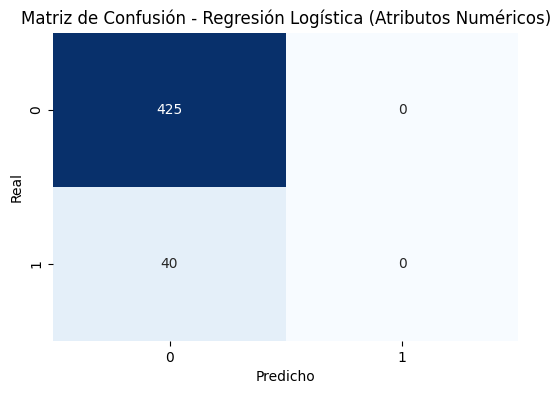

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Con solo features numéricas y clases desbalanceadas (88% clase 0), 
# el modelo tiende a predecir siempre la clase mayoritaria, resultando en 
# recall y precision = 0 para la clase minoritaria
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)

# Evaluar con train/test split
y_pred = model.predict(X_test_imputed)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred, zero_division=0))  # Será 0: predice todo clase 0
print("Precision Score:", precision_score(y_test, y_pred, zero_division=0))  # Será 0: predice todo clase 0

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística (Atributos Numéricos)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

## Modelo de Arboles de Decisión

Accuracy Score: 0.9139784946236559
Recall Score: 0.0
Precision Score: 0.0


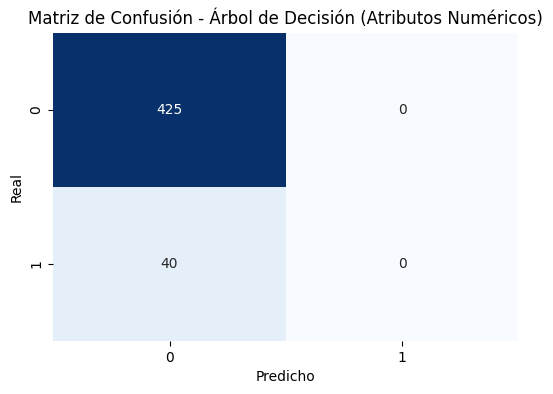

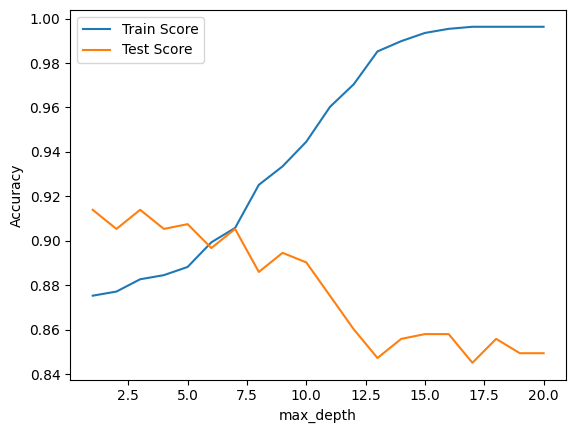

In [160]:
from sklearn.tree import DecisionTreeClassifier

# Al igual que la regresión logística, con solo features numéricas 
# no logra capturar patrones de la clase minoritaria, resultando en recall/precision = 0
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train_imputed, y_train)

# Evaluar con train/test split
y_pred = model.predict(X_test_imputed)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred, zero_division=0))  # Será 0: no detecta clase 1
print("Precision Score:", precision_score(y_test, y_pred, zero_division=0))  # Será 0: no predice clase 1

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Árbol de Decisión (Atributos Numéricos)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

# Curva de accuracy en función de la profundidad
max_depths = range(1, 21)
train_scores = []
test_scores = []

for depth in max_depths:
    arbol = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    arbol.fit(X_train_imputed, y_train)
    train_scores.append(arbol.score(X_train_imputed, y_train))
    test_scores.append(arbol.score(X_test_imputed, y_test))

plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# A partir de tanto los atributos numericos continuos como los atributos categoricos

## Seleccionar los datos

In [161]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['label'])
y = data['label']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# One-hot encoding para variables categóricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Alinear las columnas de train y test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

## Modelo de Regresión Logistica para clasificación

Accuracy Score: 0.9053763440860215
Recall Score: 0.025
Precision Score: 0.16666666666666666


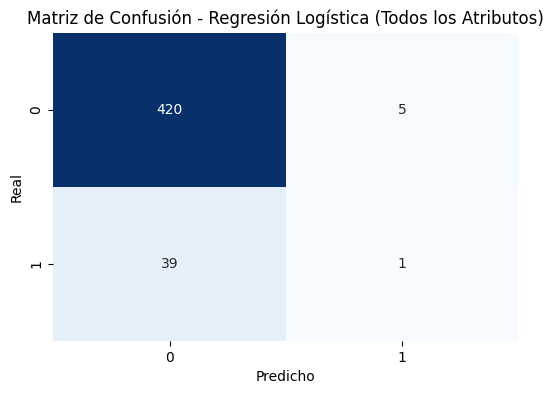

In [162]:
# Entrenar modelo
model = LogisticRegression(max_iter=10000)
model.fit(X_train_imputed, y_train)

# Evaluar con train/test split
y_pred = model.predict(X_test_imputed)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred, zero_division=0))
print("Precision Score:", precision_score(y_test, y_pred, zero_division=0))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística (Todos los Atributos)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

## Modelo de Arboles de Decisión con GridSearchCV para busqueda de hiperparametros

Mejores hiperparámetros encontrados: {'criterion': 'gini', 'max_depth': 10}
Mejor accuracy promedio (CV): 0.8753413551800648
Accuracy Score: 0.886021505376344
Recall Score: 0.175
Precision Score: 0.25925925925925924


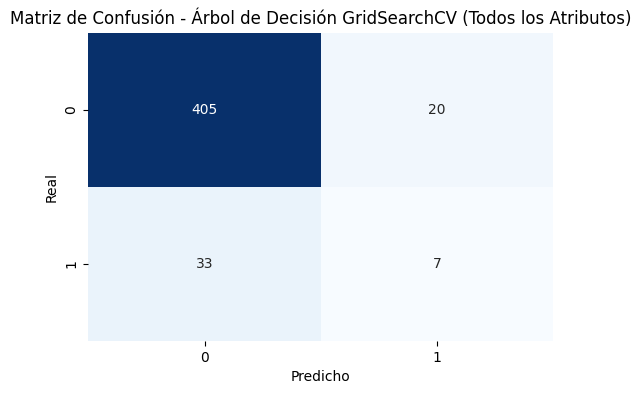

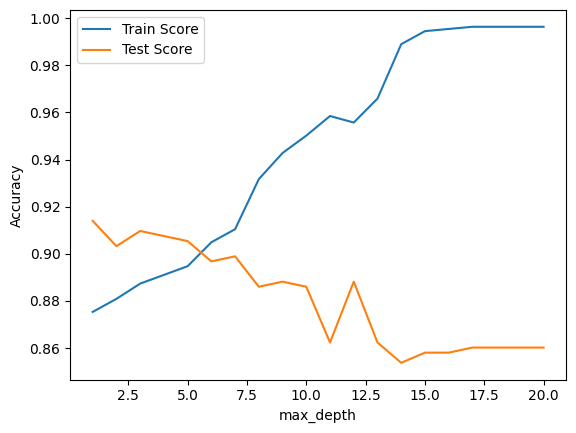

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10],  
    'criterion': ['gini', 'entropy']  
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_imputed, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor accuracy promedio (CV):", grid_search.best_score_)

# Evaluar el mejor modelo en test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_imputed)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred, zero_division=0))
print("Precision Score:", precision_score(y_test, y_pred, zero_division=0))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Árbol de Decisión GridSearchCV (Todos los Atributos)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

# Curva de accuracy en función de la profundidad con el mejor criterio encontrado
max_depths = range(1, 21)
train_scores = []
test_scores = []

for depth in max_depths:
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    arbol.fit(X_train_imputed, y_train)
    train_scores.append(arbol.score(X_train_imputed, y_train))
    test_scores.append(arbol.score(X_test_imputed, y_test))

plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Bonus: Modelo RandomForest

Mejores hiperparámetros encontrados: {'max_depth': None, 'n_estimators': 50}
Mejor accuracy promedio (CV): 0.9215224441030893
Accuracy Score: 0.9204301075268817
Recall Score: 0.25
Precision Score: 0.5882352941176471


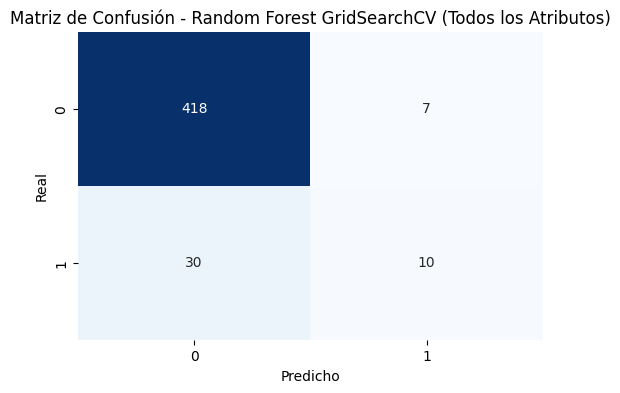

In [164]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                              scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_imputed, y_train)

print("Mejores hiperparámetros encontrados:", grid_search_rf.best_params_)
print("Mejor accuracy promedio (CV):", grid_search_rf.best_score_)

# Evaluar el mejor modelo en test
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_imputed)
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Recall Score:", recall_score(y_test, y_pred_rf, zero_division=0))
print("Precision Score:", precision_score(y_test, y_pred_rf, zero_division=0))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Random Forest GridSearchCV (Todos los Atributos)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()